This script is written to plot household TV ownership rates from approximately 1950 to the present day, and then fit this data with a user-defined fit function.

In [23]:
from array import array
import math
import random

random.seed(1)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for random number generation
np.random.seed(1)


Define a user function for fitting the data.

In [ ]:
def fitfunction_python(x,*par):
    #return par[0]/2.0*(1.0+math.tanh((x[0]-par[2])/par[1]))
    return par[0]*(1.0-np.exp(-1.0*par[1]*(x-par[2])))

def derivativefunction_python(x,par):
    return par[0]*par[1]*np.exp(-1.0*par[1]*(x-par[2]))

def fitfunction(x,par):
    #return par[0]/2.0*(1.0+math.tanh((x[0]-par[2])/par[1]))
    return par[0]*(1.0-np.exp(-1.0*par[1]*(x-par[2])))

Define python arrays to store the data.

In [ ]:
xx = array('d')
yy = array('d')

Read data from the file and store in the above python arrays.

In [27]:
npoints = 0
noise_level = 5.0
with open('tv_rate.dat') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        xx.append(float(data[0]))
        yy.append(float(data[1])-noise_level+2.0*noise_level*random.random())
    

Amplitude: 97.8 Decay Rate: 0.203 Start Year: 1.95e+03
errAmplitude: 0.472 errDecay Rate: 0.00888 errStart Year: 0.135


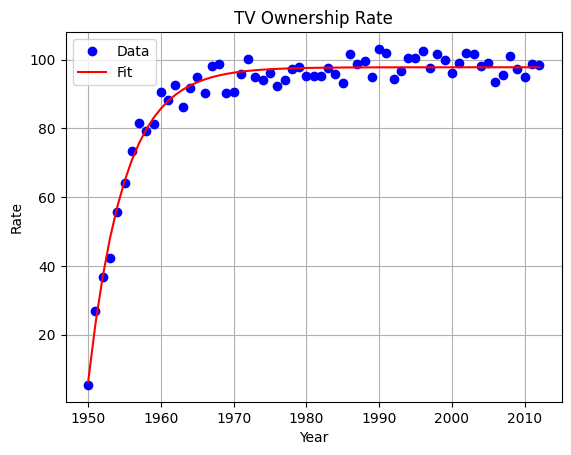

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Fit the function to the data
popt, pcov = curve_fit(fitfunction_python, xx, yy, p0=[98.0, 0.2, 1954.0])

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(xx, yy, 'bo', label='Data')

# Plot the fit function
ax.plot(xx, fitfunction_python(xx, *popt), 'r-', label='Fit')

# Set title and labels
ax.set_title('TV Ownership Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Rate')

# Show the legend
ax.legend()
# Set grid lines
ax.grid(True)

# Print the fit parameters and errors
fit_params = popt
fit_param_errors = np.sqrt(np.diag(pcov))
param_strings = [f'{name}: {value:.3g}' for name, value in zip(['Amplitude', 'Decay Rate', 'Start Year'], fit_params)]
error_strings = [f'err{name}: {error:.3g}' for name, error in zip(['Amplitude', 'Decay Rate', 'Start Year'], fit_param_errors)]
print(' '.join(param_strings))
print(' '.join(error_strings))

# Show the plot
plt.show()


In [29]:
yyp = array('d')
xxp = array('d')
fitderiv = array('d')

for i in range(1,npoints-1):
    xxp.append(xx[i])
    yyp.append((yy[i+1]-yy[i-1])/2.0)
    fitderiv.append(derivativefunction_python(xx[i],fit_params))

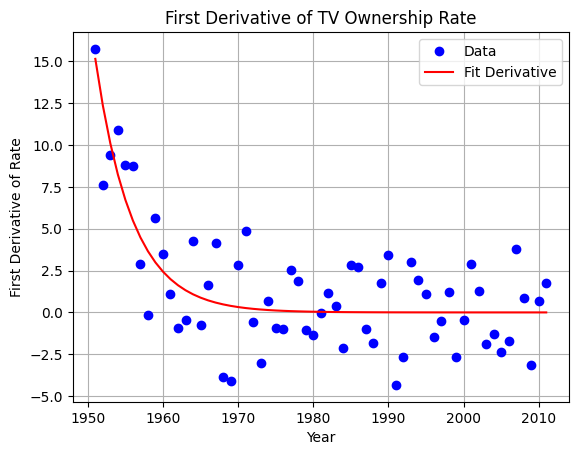

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data for the first derivative
ax.plot(xxp, yyp, 'bo', label='Data')
# Set grid lines
ax.grid(True)

# Set title and labels for the first derivative
ax.set_title('First Derivative of TV Ownership Rate')
ax.set_xlabel('Year')
ax.set_ylabel('First Derivative of Rate')

# Plot the fit derivative
ax.plot(xxp, fitderiv, 'b-', label='Fit Derivative')

# Set line color for the fit derivative
ax.lines[-1].set_color('red')

# Show the legend
ax.legend()

# Show the plot
plt.show()


In [31]:
diff = array('d')
for i in range(0,npoints):
    yfit = fitfunction(xx[i],fit_params)
    diff.append(yy[i]-yfit)

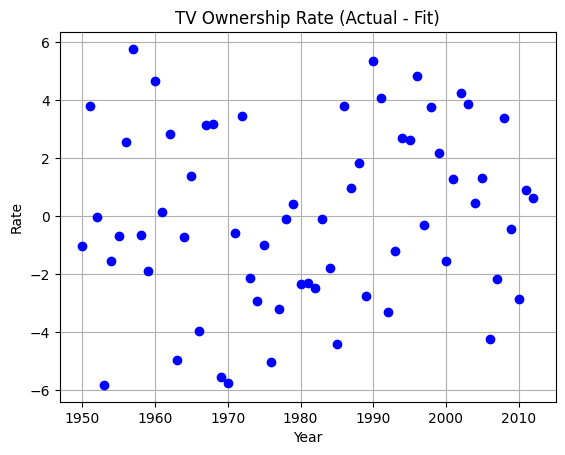

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data for the difference between actual and fit values
ax.plot(xx, diff, 'bo', label='Data')

# Set title and labels for the difference plot
ax.set_title('TV Ownership Rate (Actual - Fit)')
ax.set_xlabel('Year')
ax.set_ylabel('Rate')
# Set grid lines
ax.grid(True)
# Show the plot
plt.show()
